In [6]:
#necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
import tensorflow_hub as hub
from nltk.corpus import stopwords
import pandas_profiling as pp
import re
from bs4 import BeautifulSoup
from nltk.tokenize import TweetTokenizer, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
# Import plotly
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
init_notebook_mode(connected=True)

In [24]:
#Loading data
data = pd.read_csv("data/Text_Similarity_Dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
Unique_ID    4023 non-null int64
text1        4023 non-null object
text2        4023 non-null object
dtypes: int64(1), object(2)
memory usage: 94.4+ KB


In [5]:
#expand mapping
contraction_mapping = {
    "'cause": 'because','â€™': "'",',cause': 'because',';cause': 'because',"ain't": 'am not','ain,t': 'am not',
    'ain;t': 'am not','ain´t': 'am not','ain’t': 'am not',"aren't": 'are not','â€“': '-','â€œ':'"',
    'aren,t': 'are not','aren;t': 'are not','aren´t': 'are not','aren’t': 'are not',"can't": 'cannot',"can't've": 'cannot have','can,t': 'cannot','can,t,ve': 'cannot have',
    'can;t': 'cannot','can;t;ve': 'cannot have',
    'can´t': 'cannot','can´t´ve': 'cannot have','can’t': 'cannot','can’t’ve': 'cannot have',
    "could've": 'could have','could,ve': 'could have','could;ve': 'could have',"couldn't": 'could not',"couldn't've": 'could not have','couldn,t': 'could not','couldn,t,ve': 'could not have','couldn;t': 'could not',
    'couldn;t;ve': 'could not have','couldn´t': 'could not',
    'couldn´t´ve': 'could not have','couldn’t': 'could not','couldn’t’ve': 'could not have','could´ve': 'could have',
    'could’ve': 'could have',"didn't": 'did not','didn,t': 'did not','didn;t': 'did not','didn´t': 'did not',
    'didn’t': 'did not',"doesn't": 'does not','doesn,t': 'does not','doesn;t': 'does not','doesn´t': 'does not',
    'doesn’t': 'does not',"don't": 'do not','don,t': 'do not','don;t': 'do not','don´t': 'do not','don’t': 'do not',
    "hadn't": 'had not',"hadn't've": 'had not have','hadn,t': 'had not','hadn,t,ve': 'had not have','hadn;t': 'had not',
    'hadn;t;ve': 'had not have','hadn´t': 'had not','hadn´t´ve': 'had not have','hadn’t': 'had not','hadn’t’ve': 'had not have',"hasn't": 'has not','hasn,t': 'has not','hasn;t': 'has not','hasn´t': 'has not','hasn’t': 'has not',
    "haven't": 'have not','haven,t': 'have not','haven;t': 'have not','haven´t': 'have not','haven’t': 'have not',"he'd": 'he would',
    "he'd've": 'he would have',"he'll": 'he will',
    "he's": 'he is','he,d': 'he would','he,d,ve': 'he would have','he,ll': 'he will','he,s': 'he is','he;d': 'he would',
    'he;d;ve': 'he would have','he;ll': 'he will','he;s': 'he is','he´d': 'he would','he´d´ve': 'he would have','he´ll': 'he will',
    'he´s': 'he is','he’d': 'he would','he’d’ve': 'he would have','he’ll': 'he will','he’s': 'he is',"how'd": 'how did',"how'll": 'how will',
    "how's": 'how is','how,d': 'how did','how,ll': 'how will','how,s': 'how is','how;d': 'how did','how;ll': 'how will',
    'how;s': 'how is','how´d': 'how did','how´ll': 'how will','how´s': 'how is','how’d': 'how did','how’ll': 'how will',
    'how’s': 'how is',"i'd": 'i would',"i'll": 'i will',"i'm": 'i am',"i've": 'i have','i,d': 'i would','i,ll': 'i will',
    'i,m': 'i am','i,ve': 'i have','i;d': 'i would','i;ll': 'i will','i;m': 'i am','i;ve': 'i have',"isn't": 'is not',
    'isn,t': 'is not','isn;t': 'is not','isn´t': 'is not','isn’t': 'is not',"it'd": 'it would',"it'll": 'it will',"It's":'it is',
    "it's": 'it is','it,d': 'it would','it,ll': 'it will','it,s': 'it is','it;d': 'it would','it;ll': 'it will','it;s': 'it is','it´d': 'it would','it´ll': 'it will','it´s': 'it is',
    'it’d': 'it would','it’ll': 'it will','it’s': 'it is',
    'i´d': 'i would','i´ll': 'i will','i´m': 'i am','i´ve': 'i have','i’d': 'i would','i’ll': 'i will','i’m': 'i am',
    'i’ve': 'i have',"let's": 'let us','let,s': 'let us','let;s': 'let us','let´s': 'let us',
    'let’s': 'let us',"ma'am": 'madam','ma,am': 'madam','ma;am': 'madam',"mayn't": 'may not','mayn,t': 'may not','mayn;t': 'may not',
    'mayn´t': 'may not','mayn’t': 'may not','ma´am': 'madam','ma’am': 'madam',"might've": 'might have','might,ve': 'might have','might;ve': 'might have',"mightn't": 'might not','mightn,t': 'might not','mightn;t': 'might not','mightn´t': 'might not',
    'mightn’t': 'might not','might´ve': 'might have','might’ve': 'might have',"must've": 'must have','must,ve': 'must have','must;ve': 'must have',
    "mustn't": 'must not','mustn,t': 'must not','mustn;t': 'must not','mustn´t': 'must not','mustn’t': 'must not','must´ve': 'must have',
    'must’ve': 'must have',"needn't": 'need not','needn,t': 'need not','needn;t': 'need not','needn´t': 'need not','needn’t': 'need not',"oughtn't": 'ought not','oughtn,t': 'ought not','oughtn;t': 'ought not',
    'oughtn´t': 'ought not','oughtn’t': 'ought not',"sha'n't": 'shall not','sha,n,t': 'shall not','sha;n;t': 'shall not',"shan't": 'shall not',
    'shan,t': 'shall not','shan;t': 'shall not','shan´t': 'shall not','shan’t': 'shall not','sha´n´t': 'shall not','sha’n’t': 'shall not',
    "she'd": 'she would',"she'll": 'she will',"she's": 'she is','she,d': 'she would','she,ll': 'she will',
    'she,s': 'she is','she;d': 'she would','she;ll': 'she will','she;s': 'she is','she´d': 'she would','she´ll': 'she will',
    'she´s': 'she is','she’d': 'she would','she’ll': 'she will','she’s': 'she is',"should've": 'should have','should,ve': 'should have','should;ve': 'should have',
    "shouldn't": 'should not','shouldn,t': 'should not','shouldn;t': 'should not','shouldn´t': 'should not','shouldn’t': 'should not','should´ve': 'should have',
    'should’ve': 'should have',"that'd": 'that would',"that's": 'that is','that,d': 'that would','that,s': 'that is','that;d': 'that would',
    'that;s': 'that is','that´d': 'that would','that´s': 'that is','that’d': 'that would','that’s': 'that is',"there'd": 'there had',
    "there's": 'there is','there,d': 'there had','there,s': 'there is','there;d': 'there had','there;s': 'there is',
    'there´d': 'there had','there´s': 'there is','there’d': 'there had','there’s': 'there is',
    "they'd": 'they would',"they'll": 'they will',"they're": 'they are',"they've": 'they have',
    'they,d': 'they would','they,ll': 'they will','they,re': 'they are','they,ve': 'they have','they;d': 'they would','they;ll': 'they will','they;re': 'they are',
    'they;ve': 'they have','they´d': 'they would','they´ll': 'they will','they´re': 'they are','they´ve': 'they have','they’d': 'they would','they’ll': 'they will',
    'they’re': 'they are','they’ve': 'they have',"wasn't": 'was not','wasn,t': 'was not','wasn;t': 'was not','wasn´t': 'was not',
    'wasn’t': 'was not',"we'd": 'we would',"we'll": 'we will',"we're": 'we are',"we've": 'we have','we,d': 'we would','we,ll': 'we will',
    'we,re': 'we are','we,ve': 'we have','we;d': 'we would','we;ll': 'we will','we;re': 'we are','we;ve': 'we have',
    "weren't": 'were not','weren,t': 'were not','weren;t': 'were not','weren´t': 'were not','weren’t': 'were not','we´d': 'we would','we´ll': 'we will',
    'we´re': 'we are','we´ve': 'we have','we’d': 'we would','we’ll': 'we will','we’re': 'we are','we’ve': 'we have',"what'll": 'what will',"what're": 'what are',"what's": 'what is',
    "what've": 'what have','what,ll': 'what will','what,re': 'what are','what,s': 'what is','what,ve': 'what have','what;ll': 'what will','what;re': 'what are',
    'what;s': 'what is','what;ve': 'what have','what´ll': 'what will',
    'what´re': 'what are','what´s': 'what is','what´ve': 'what have','what’ll': 'what will','what’re': 'what are','what’s': 'what is',
    'what’ve': 'what have',"where'd": 'where did',"where's": 'where is','where,d': 'where did','where,s': 'where is','where;d': 'where did',
    'where;s': 'where is','where´d': 'where did','where´s': 'where is','where’d': 'where did','where’s': 'where is',
    "who'll": 'who will',"who's": 'who is','who,ll': 'who will','who,s': 'who is','who;ll': 'who will','who;s': 'who is',
    'who´ll': 'who will','who´s': 'who is','who’ll': 'who will','who’s': 'who is',"won't": 'will not','won,t': 'will not','won;t': 'will not',
    'won´t': 'will not','won’t': 'will not',"wouldn't": 'would not','wouldn,t': 'would not','wouldn;t': 'would not','wouldn´t': 'would not',
    'wouldn’t': 'would not',"you'd": 'you would',"you'll": 'you will',"you're": 'you are','you,d': 'you would','you,ll': 'you will',
    'you,re': 'you are','you;d': 'you would','you;ll': 'you will',
    'you;re': 'you are','you´d': 'you would','you´ll': 'you will','you´re': 'you are','you’d': 'you would','you’ll': 'you will','you’re': 'you are',
    '´cause': 'because','’cause': 'because',"you've": "you have","could'nt": 'could not',
    "havn't": 'have not',"here’s": "here is",'i""m': 'i am',"i'am": 'i am',"i'l": "i will","i'v": 'i have',"wan't": 'want',"was'nt": "was not","who'd": "who would",
    "who're": "who are","who've": "who have","why'd": "why would","would've": "would have","y'all": "you all","y'know": "you know",
    "your'e": "you are","arn't": "are not","agains't": "against","c'mon": "common","doens't": "does not",'don""t': "do not","dosen't": "does not",
    "dosn't": "does not","shoudn't": "should not","that'll": "that will","there'll": "there will","there're": "there are",
    "this'll": "this all","u're": "you are", "ya'll": "you all","you'r": "you are","you’ve": "you have","d'int": "did not","did'nt": "did not","din't": "did not","dont't": "do not","gov't": "government",
    "i'ma": "i am","is'nt": "is not","‘I":'I',
    }

In [7]:
#data preprocessing using regular expression
tokenizer = RegexpTokenizer(r'\w+')
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
neg_pattern = re.compile(r'\b(' + '|'.join(contraction_mapping.keys()) + r')\b')
def clean_text(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: contraction_mapping[x.group()], lower_case)
    letters_only = re.sub("[0-9]", " ", neg_handled)
    tokens_sentences = [tokenizer.tokenize(t) for t in nltk.sent_tokenize(letters_only)]
    sentences = []
    for words_tokens in tokens_sentences:
        sentence = []
        for word in words_tokens:
            sentence.append(word)
        sentences.append(" ".join(sentence))
    return sentences

In [8]:
#Cleaning the text
data['text1_cleaned'] = data['text1'].apply(lambda x: clean_text(x))
data['text2_cleaned'] = data['text2'].apply(lambda x: clean_text(x))

#### EDA

In [12]:
#Check how many paragragh are duplicate
count=0
for i in range(len(data['text1_cleaned'])):
    if data['text1_cleaned'][i]==data['text2_cleaned'][i]:
        count+=1
print(count)

1


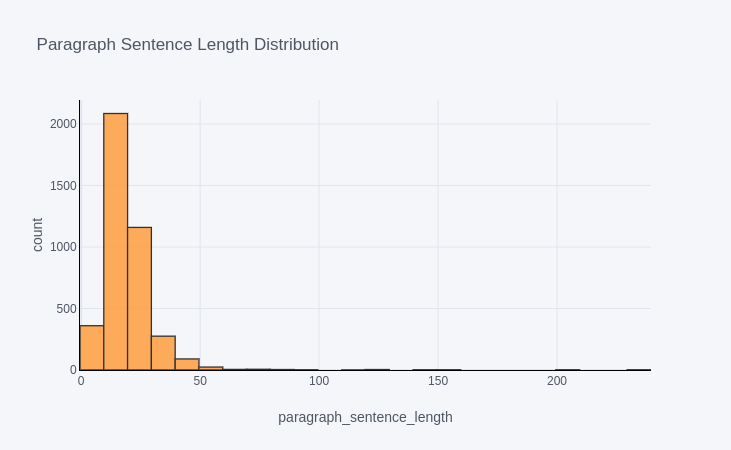

In [18]:
#Sentence Length Distribution wise Length distribution
data['len_paragraphs1'] = data['text1_cleaned'].apply(lambda x:len(x))
data['len_paragraphs1'].iplot(
    kind='hist',
    bins=40,
    xTitle='paragraph_sentence_length',
    linecolor='black',
    yTitle='count',
    title='Paragraph Sentence Length Distribution')

In [9]:
data['len_paragraphs1'].describe()

count    4023.000000
mean       19.359185
std        12.262766
min         4.000000
25%        13.000000
50%        17.000000
75%        23.000000
max       231.000000
Name: len_paragraphs1, dtype: float64

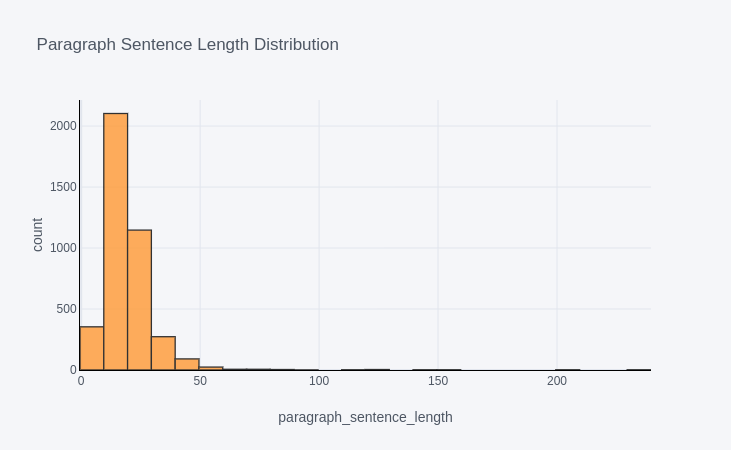

In [19]:
data['len_paragraphs2'] = data['text2_cleaned'].apply(lambda x:len(x))
data['len_paragraphs2'].iplot(
    kind='hist',
    bins=40,
    xTitle='paragraph_sentence_length',
    linecolor='black',
    yTitle='count',
    title='Paragraph Sentence Length Distribution')

In [11]:
data['len_paragraphs2'].describe()

count    4023.000000
mean       19.374099
std        12.327719
min         4.000000
25%        13.000000
50%        17.000000
75%        23.000000
max       231.000000
Name: len_paragraphs2, dtype: float64

In [21]:
def word_len(x):
    length = 0
    for i in x:
        length+=len(i)
    return length

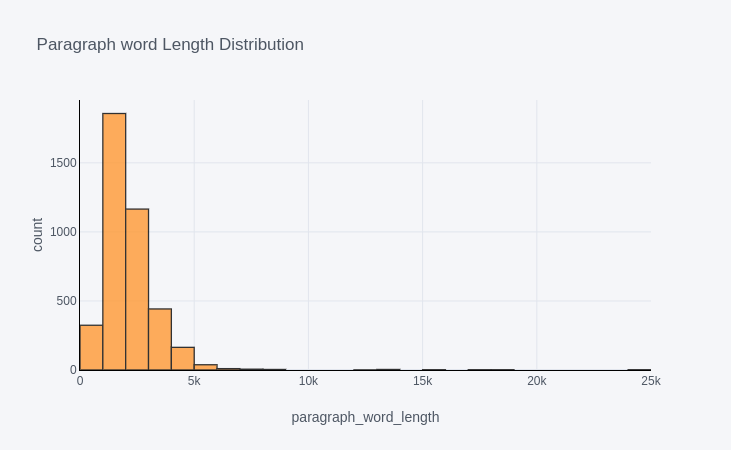

In [22]:
#Word Length Distribution
data['word_len_paragraphs1'] = data['text1_cleaned'].apply(lambda x: word_len(x))
data['word_len_paragraphs1'].iplot(
    kind='hist',
    bins=40,
    xTitle='paragraph_word_length',
    linecolor='black',
    yTitle='count',
    title='Paragraph word Length Distribution')

In [14]:
data['word_len_paragraphs1'].describe()

count     4023.000000
mean      2122.174248
std       1307.511731
min        484.000000
25%       1347.000000
50%       1839.000000
75%       2631.000000
max      24211.000000
Name: word_len_paragraphs1, dtype: float64

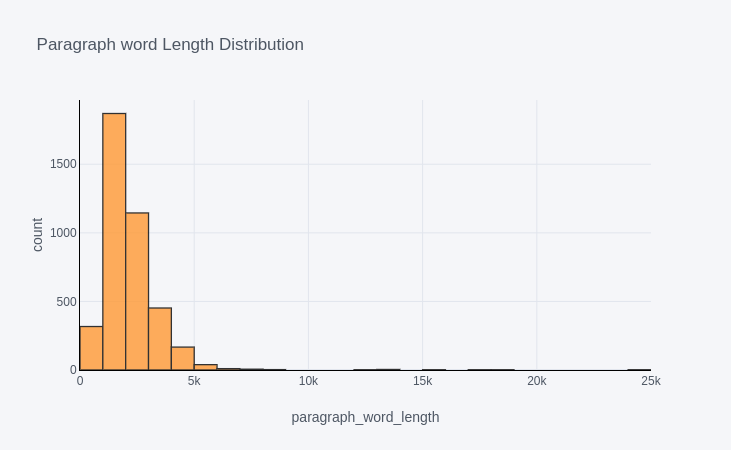

In [23]:
data['word_len_paragraphs2'] = data['text2_cleaned'].apply(lambda x: word_len(x))
data['word_len_paragraphs2'].iplot(
    kind='hist',
    bins=40,
    xTitle='paragraph_word_length',
    linecolor='black',
    yTitle='count',
    title='Paragraph word Length Distribution')

In [16]:
data['word_len_paragraphs2'].describe()

count     4023.000000
mean      2127.434750
std       1317.443316
min        484.000000
25%       1352.500000
50%       1839.000000
75%       2643.000000
max      24211.000000
Name: word_len_paragraphs2, dtype: float64

### Model 

In [8]:
#Loading Pretrained model
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)

In [72]:
#Method to the get the Embeddings
def get_vectors(paragraphs):
    return model(paragraphs)

In [73]:
para_v1 = data['text1_cleaned'].apply(lambda x: get_vectors(x)[0])
para_v2 = data['text2_cleaned'].apply(lambda x: get_vectors(x)[0])

In [75]:
#simlarity metric method 
def cosine_similarity(v1, v2):
    mag1 = np.linalg.norm(v1)
    mag2 = np.linalg.norm(v2)
    if (not mag1) or (not mag2):
        return 0
    return np.dot(v1, v2) / (mag1 * mag2)

In [116]:
#Getting the similarity score for whole datasets
def semantic_similarity():
    scores = []
    for i in range(len(para_v1)):
        score = cosine_similarity(para_v1[i], para_v2[i])
        if score<0:
            score = 0.00
        scores.append(round(score,2))
    return scores
simi_scores = semantic_similarity()

In [117]:
#Saving the score in csv file
submission = pd.DataFrame({'Unique_ID':data['Unique_ID'],'Similarity_Score':simi_scores})
submission = submission[['Unique_ID','Similarity_Score']]
submission.to_csv('similarity_score.csv',index=False)